In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [21]:
data_url='http://data-serv/iris.csv'
iris_full = pd.read_csv(data_url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
iris = iris_full.iloc[:, 0:4].astype(float)  # need separate dataframe containing first 4 attributes

In [29]:
def do_kmeans(X, K):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_, kmeans.cluster_centers_, kmeans.predict(X)
def do_plot(X, labels, centers, y_kmeans):
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

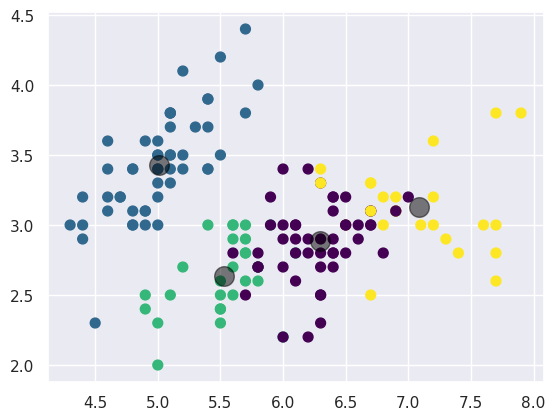

In [31]:
labels,centers,y_kmeans = do_kmeans(iris.values, 4)
do_plot(iris.values, labels, centers, y_kmeans)

In [4]:
classification = pd.read_csv('http://data-serv/csv/small_csv_files/revised.csv')

In [6]:
classification.tail(10)

,time_ref,account,code,country_code,product_type,value,status
115978,202409,Imports,A12123,TL,Services,5234.0,F
115979,202409,Imports,A12123,TO,Services,5234.0,F
115980,202409,Imports,A12123,TOT,Services,335000.0,F
115981,202409,Imports,A12123,TR,Services,NaN,C
115982,202409,Imports,A12123,TW,Services,5234.0,F
115983,202409,Imports,A12123,US,Services,15703.0,F
115984,202409,Imports,A12123,VN,Services,10469.0,F
115985,202409,Imports,A12123,VU,Services,5234.0,F
115986,202409,Imports,A12123,WS,Services,5234.0,F
115987,202409,Imports,A12123,ZA,Services,5234.0,F


In [7]:
print(classification.info())
print(f"Dataset contains {classification.shape[0]} rows and {classification.shape[1]} columns.\n")
print(classification.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115988 entries, 0 to 115987
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time_ref      115988 non-null  int64  
 1   account       115988 non-null  object 
 2   code          115988 non-null  object 
 3   country_code  115938 non-null  object 
 4   product_type  115988 non-null  object 
 5   value         109735 non-null  float64
 6   status        115988 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ MB
None
Dataset contains 115988 rows and 7 columns.

            time_ref         value
count  115988.000000  1.097350e+05
mean   202410.497103  6.362924e+06
std         1.500004  2.016157e+08
min    202409.000000 -7.239452e+08
25%    202409.000000  2.589000e+03
50%    202409.000000  2.445200e+04
75%    202412.000000  2.301690e+05
max    202412.000000  2.139206e+10


In [17]:
encode = LabelEncoder()
columns_to_encode = ['account', 'code', 'country_code', 'product_type', 'status']
for column in columns_to_encode:
    classification[column] = encode.fit_transform(classification[column])

In [18]:
print(classification.info())
print(f"Dataset contains {classification.shape[0]} rows and {classification.shape[1]} columns.\n")
print(classification.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115988 entries, 0 to 115987
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time_ref      115988 non-null  int64  
 1   account       115988 non-null  int64  
 2   code          115988 non-null  int64  
 3   country_code  115988 non-null  int64  
 4   product_type  115988 non-null  int64  
 5   value         109735 non-null  float64
 6   status        115988 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 6.2 MB
None
Dataset contains 115988 rows and 7 columns.

            time_ref        account           code   country_code  \
count  115988.000000  115988.000000  115988.000000  115988.000000   
mean   202410.497103       0.571533     761.664439     118.512777   
std         1.500004       0.494859     418.703724      71.580705   
min    202409.000000       0.000000       0.000000       0.000000   
25%    202409.000000       0.000000     404.00000

In [33]:
if classification.isnull().values.any():
    classification = classification.interpolate()

In [37]:
print(classification.head())
print(classification.tail(10))

   time_ref  account  code  country_code  product_type        value  status
0    202412        0     0             0             0       2581.0       1
1    202412        0     0             1             0  323384662.0       1
2    202412        0     0             3             0     266255.0       1
3    202412        0     0             4             0      11760.0       1
4    202412        0     0             5             0     639168.0       1
        time_ref  account  code  country_code  product_type     value  status
115978    202409        1  1366           210             1    5234.0       1
115979    202409        1  1366           213             1    5234.0       1
115980    202409        1  1366           214             1  335000.0       1
115981    202409        1  1366           219             1  170117.0       0
115982    202409        1  1366           222             1    5234.0       1
115983    202409        1  1366           227             1   15703.0       

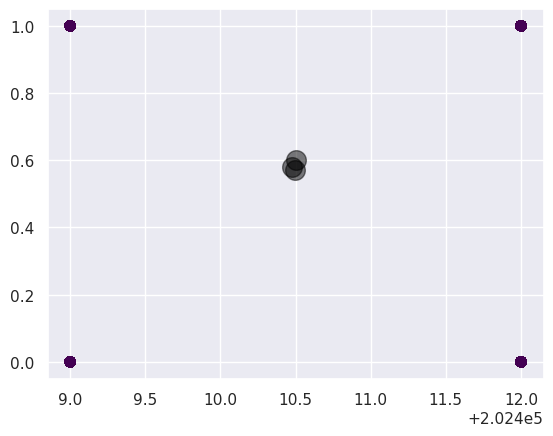

In [39]:
labels,centers,y_kmeans = do_kmeans(classification.values, 3)
do_plot(classification.values, labels, centers, y_kmeans)